# KML to GeoJSON

Esta scrip convertira un archivo KML en GeoJSON con la finalidad de que pueda ser utilizada como una geometria de earth engine

**IMPORTACION DE LIBRERIAS**

In [7]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import json

In [5]:
# 1) Obtención de la dirección de trabajo
direction = os.getcwd()

# Remove the last part of the path
direction = os.path.dirname(direction)


**CARGA DEL KML**

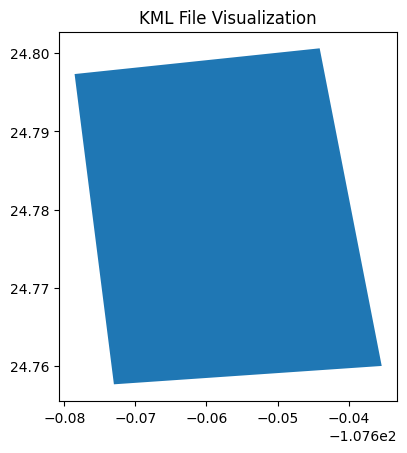

In [6]:
# Direction of the KML
kml_file = direction + "/data/01_raw/Agricultura.kml"

# Nombre del archivo GeoJson a exportar
geojson_file = direction + "/data/01_raw/Agricultura.geojson"

# 1) Lectura del kml
gdf = gpd.read_file(filename=kml_file, driver="KML")

# 2) Exportación del kml a un Geo JSON
gdf.to_file(filename=geojson_file, driver="GeoJSON")

# Plot using Geopandas
gdf.plot()

# Customize the plot
plt.title("KML File Visualization")
plt.show()

**TRANFORMACION DEL JSON**

Tiene unos datos (elevación) que se deben de eliminar

In [8]:
# Step 1: Load the GeoJSON file
with open(geojson_file, "r") as f:
    geojson_data = json.load(f)

geojson_data["features"][0]["geometry"] # IMPORTANTE: Vease como contiene una tercera coordenada que es la altura (los valores de 0) , se deben de retirar

{'type': 'Polygon',
 'coordinates': [[[-107.6730266244965, 24.75766085153008, 0.0],
   [-107.6353327971003, 24.76000824378666, 0.0],
   [-107.6440665193485, 24.80059938041618, 0.0],
   [-107.6785631858739, 24.79730942750482, 0.0],
   [-107.6730266244965, 24.75766085153008, 0.0]]]}

In [9]:
# Step 2: Function to remove the third dimension
def remove_third_dimension(geometry):
    """Removes the third dimension (z-values) from GeoJSON coordinates."""
    if geometry["type"] == "Polygon":
        geometry["coordinates"] = [
            [[coord[0], coord[1]] for coord in ring] for ring in geometry["coordinates"]
        ]
    elif geometry["type"] == "MultiPolygon":
        geometry["coordinates"] = [
            [[[coord[0], coord[1]] for coord in ring] for ring in polygon]
            for polygon in geometry["coordinates"]
        ]
    elif geometry["type"] == "LineString":
        geometry["coordinates"] = [[coord[0], coord[1]] for coord in geometry["coordinates"]]
    elif geometry["type"] == "Point":
        geometry["coordinates"] = geometry["coordinates"][:2]
    return geometry

# Step 3: Clean the geometry, ejecucón de la funcion
cleaned_geometry = remove_third_dimension(geojson_data["features"][0]["geometry"])
cleaned_geometry # Vease ocmo aqui ya estan retirados la tercera dimensión de la altura

{'type': 'Polygon',
 'coordinates': [[[-107.6730266244965, 24.75766085153008],
   [-107.6353327971003, 24.76000824378666],
   [-107.6440665193485, 24.80059938041618],
   [-107.6785631858739, 24.79730942750482],
   [-107.6730266244965, 24.75766085153008]]]}

**EXPORTACION**

In [11]:
# Paso 5: Exportar a un archivo GeoJSON
output_file = direction + "/data/01_raw/AOI.geojson"
with open(output_file, "w") as file:
    json.dump(cleaned_geometry, file, indent=2)